In [16]:
!pip install quandl --user

In [17]:
import quandl

# https://www.quandl.com/tools/python
quandl.ApiConfig.api_key = "key"

# CHRIS/CME_CL1: NYMEX Crude Oil Futures (https://blog.quandl.com/api-for-commodity-data)
# CHRIS/CME_ES1: E-mini S&P 500 Futures, Continuous Contract #1 (ES1) (Front Month)

cl = quandl.get('CHRIS/CME_CL1')
es = quandl.get('CHRIS/CME_ES1')

In [18]:
es.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
2017-11-07,2587.75,2593.50,2580.75,2586.00,2.00,2586.75,1152813,3158316
2017-11-08,2584.00,2592.50,2579.75,2590.50,4.25,2591.00,1037057,3167322
2017-11-09,2591.25,2594.50,2563.25,2583.25,7.00,2584.00,2203891,3156032
2017-11-10,2582.00,2585.75,2571.50,2578.75,4.50,2579.50,1178663,3155416
2017-11-13,2580.25,2585.50,2570.25,2581.00,2.50,2582.00,1044536,3179045


In [19]:
es.describe()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
count,5164.000000,5164.000000,5164.000000,5164.000000,925.000000,5164.000000,5164.000000,5164.000000
mean,1395.162810,1405.171088,1384.702024,1395.660542,11.087568,1395.642771,1103535.772076,1562199.510070
std,401.594301,401.574645,401.815378,401.990697,11.197770,401.963982,933344.846209,1178680.776959
min,674.750000,694.750000,665.750000,676.000000,0.250000,676.000000,0.000000,0.000000
25%,1120.750000,1128.000000,1112.750000,1121.250000,3.250000,1121.250000,238768.000000,281056.250000
50%,1295.000000,1305.000000,1286.000000,1295.000000,7.500000,1295.000000,952437.500000,1680023.500000
75%,1515.250000,1521.812500,1504.000000,1515.500000,15.250000,1515.500000,1714343.500000,2759985.250000
max,2591.250000,2594.500000,2580.750000,2590.500000,100.250000,2591.000000,6285917.000000,3594453.000000


In [20]:
es[es['Open'].isnull()].head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,


In [21]:
es_close = es.Settle
es_close.head()

Date
1997-09-09    934
1997-09-10    915
1997-09-11    908
1997-09-12    924
1997-09-15    922
Name: Settle, dtype: float64

In [22]:
print(type(es))
print(type(es_close))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [23]:
# check the crude time series as well
cl.describe()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
count,8701.000000,8701.000000,8701.000000,8701.000000,942.000000,8701.000000,8701.000000,8700.000000
mean,42.078336,42.644135,41.484589,42.081894,0.900807,42.081919,134329.331686,138647.601954
std,28.877870,29.249469,28.457645,28.872050,0.774279,28.872039,162185.374842,128361.090150
min,10.000000,11.020000,9.750000,10.420000,0.010000,10.420000,0.000000,0.000000
25%,19.800000,19.970000,19.580000,19.780000,0.320000,19.780000,31599.000000,48782.250000
50%,29.210000,29.480000,28.950000,29.270000,0.700000,29.270000,62709.000000,91486.500000
75%,59.650000,60.400000,58.650000,59.610000,1.270000,59.630000,207294.000000,202046.000000
max,145.190000,147.270000,143.220000,145.290000,7.540000,145.290000,1282869.000000,642793.000000


In [24]:
# That's a lot more counts. Does the crude time series start earlier than e-mini's?
cl.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1983-03-30,29.01,29.56,29.01,29.40,NaN,29.40,949,470
1983-03-31,29.40,29.60,29.25,29.29,NaN,29.29,521,523
1983-04-04,29.30,29.70,29.29,29.44,NaN,29.44,156,583
1983-04-05,29.50,29.80,29.50,29.71,NaN,29.71,175,623
1983-04-06,29.90,29.92,29.65,29.90,NaN,29.90,392,640


In [25]:
earliest_es_date = es.index[0]

# at first glance, you could just do
cl[earliest_es_date:].head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1997-09-09,19.43,19.61,19.37,19.42,NaN,19.42,32299,88070
1997-09-10,19.57,19.57,19.35,19.42,NaN,19.42,41858,86872
1997-09-11,19.49,19.72,19.30,19.37,NaN,19.37,52342,80434
1997-09-12,19.42,19.47,19.27,19.32,NaN,19.32,28540,80440
1997-09-15,19.29,19.38,19.23,19.27,NaN,19.27,31610,76590


In [26]:
# but just in case there is no matching precise date, we can also take the closest date:
closest_row = cl.index.searchsorted(earliest_es_date)
cl_close = cl.iloc[closest_row:].Settle
cl_close.head()

Date
1997-09-09    19.42
1997-09-10    19.42
1997-09-11    19.37
1997-09-12    19.32
1997-09-15    19.27
Name: Settle, dtype: float64

In [27]:
cl.iloc[closest_row:].columns

Index([u'Open', u'High', u'Low', u'Last', u'Change', u'Settle', u'Volume',
       u'Previous Day Open Interest'],
      dtype='object')

Populating the interactive namespace from numpy and matplotlib


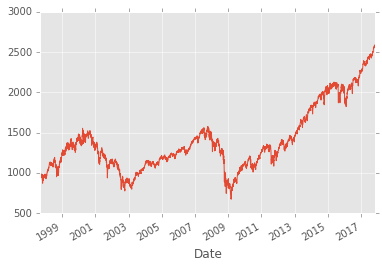

In [28]:
import matplotlib
import matplotlib.pyplot as plt
# use new pretty plots
matplotlib.style.use('ggplot')

%pylab inline

es_close.plot()

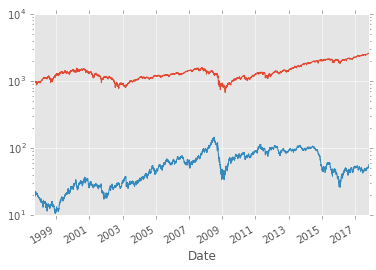

In [29]:
plt.figure()
es_close.plot()
cl_close.plot()
plt.yscale('log')

In [30]:
es['Settle'].corr(cl['Settle'])

0.19396674674966549

In [31]:
import pandas as pd
pd.rolling_corr(es_close, cl_close, window=252).dropna()
# why 252? because that's the number of trading days in a year

Date
2014-11-21   -0.369646
2014-11-24   -0.386641
2014-11-25   -0.404232
2014-11-26   -0.421947
2014-11-28   -0.441608
2014-12-01   -0.457250
2014-12-02   -0.473815
2014-12-03   -0.488969
2014-12-04   -0.502630
2014-12-05   -0.516329
2014-12-08   -0.526947
2014-12-09   -0.536849
2014-12-10   -0.541803
2014-12-11   -0.548337
2014-12-12   -0.549632
2014-12-15   -0.549979
2014-12-16   -0.546815
2014-12-17   -0.551038
2014-12-18   -0.560348
2014-12-19   -0.569132
2014-12-22   -0.577833
2014-12-23   -0.586649
2014-12-24   -0.594898
2014-12-26   -0.603125
2014-12-29   -0.610925
2014-12-30   -0.617783
2014-12-31   -0.622196
2015-01-02   -0.626952
2015-01-05   -0.628422
2015-01-06   -0.627138
                ...   
2017-10-03   -0.170644
2017-10-04   -0.170901
2017-10-05   -0.166129
2017-10-06   -0.163808
2017-10-09   -0.162281
2017-10-10   -0.153972
2017-10-11   -0.145636
2017-10-12   -0.140740
2017-10-13   -0.132987
2017-10-16   -0.124356
2017-10-17   -0.116894
2017-10-18   -0.108034
2017-1

In [32]:
print(len(cl_close))
print(len(es_close))

5072
5164


In [33]:
merged = pd.concat({'es': es_close, 'cl': cl_close}, axis=1)
# maybe this is the culprit?
merged[merged['cl'].isnull()].head()

,cl,es
Date,,
1997-11-27,NaN,959.50
1997-11-28,NaN,955.00
1998-01-19,NaN,972.25
1998-02-16,NaN,1019.00
1998-05-25,NaN,1116.50


In [34]:
merged.dropna(how='any', inplace=True)
# BAD DATA BEGONE!
merged[merged['cl'].isnull()]

,cl,es
Date,,


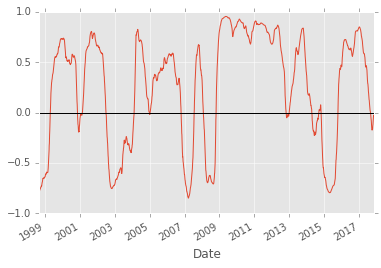

In [35]:
pd.rolling_corr(merged.es, merged.cl, window=252).dropna().plot()
plt.axhline(0, color='k')

In [36]:
import numpy as np
print('Autocorrelation for a random series is {:.3f}'.format(
    pd.Series(np.random.randn(100000)).autocorr())
)
print('But, autocorrelation for S&P is {:3f}'.format(es_close.autocorr()))

Autocorrelation for a random series is -0.010
But, autocorrelation for S&P is 0.999299


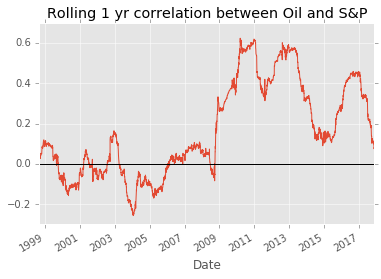

In [37]:
daily_returns = merged.pct_change()
rolling_correlation = pd.rolling_corr(daily_returns.es, daily_returns.cl, window=252).dropna()
rolling_correlation.plot()
plt.axhline(0, color='k')
title('Rolling 1 yr correlation between Oil and S&P')

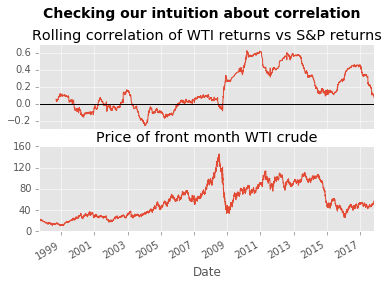

In [38]:
# vertically split into two subplots, and align x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.suptitle('Checking our intuition about correlation', fontsize=14, fontweight='bold')
# make space for the title
fig.subplots_adjust(top=0.85)

rolling_correlation.plot(ax=ax1)
ax1.set_title('Rolling correlation of WTI returns vs S&P returns')
ax1.axhline(0, color='k')
ax1.tick_params(
    which='both',  # both major and minor ticks
    bottom='off', top='off', right='off',
    labelbottom='off'  # labels along the bottom edge are off
)


cl_close.plot(ax=ax2)
ax2.set_title('Price of front month WTI crude')
ax2.tick_params(which='both', top='off', right='off')
ax2.tick_params(which='minor', bottom='off')
ax2.yaxis.set_major_locator(MaxNLocator(5)) # how many ticks